In [45]:
import json
import os
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from docx import Document
from docx.shared import Pt
import pickle
import os
from tqdm import tqdm
import time
from langdetect import detect
import matplotlib.pyplot as plt
import collections
from IPython.display import display

import spacy.cli
from spacy.language import Language
import math

from IPython.display import display
import nltk

from transformers import BertTokenizer
import seaborn as sns
from tabulate import *
import prettytable
from prettytable import PrettyTable
from textwrap import fill

from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
def get_general_statistics(list_of_sentences):
    
    diz_metrics = {}
    words = []
    
    for sent in list_of_sentences:
        words.extend(nltk.word_tokenize(sent))
        
    vocabolario = list(set([w.lower() for w in words]))
    
    diz_metrics['total_number_of_sentences'] = len(list_of_sentences)
    diz_metrics['total_number_of_tokens'] = len(words)
    diz_metrics['total_number_of_types'] = len(vocabolario)
    
    return diz_metrics

In [3]:
def get_average_sentence_length(list_of_sentences):
    
    words = []
    
    for sent in list_of_sentences:
        words.extend(nltk.word_tokenize(sent))
        
    return "%.4f" %(len(words)/len(list_of_sentences))

In [4]:
def get_TTR(list_of_sentences):
    
    words = []
    
    for sent in list_of_sentences:
        words.extend(nltk.word_tokenize(sent))
        
    num_of_type = list(set([w.lower() for w in words]))
        
    return "%.4f" %(len(num_of_type)/len(words))

In [5]:
def get_average_pos_in_sentence(list_of_sentences):
    
    """
    Calcolo quante pos ci sono in media in ogni frase
    """
    
    diz_pos = {}
    
    for sent in tqdm(list_of_sentences):
        
        #processo la frase con spacy
        processed_sent = nlp(sent)
        
        #calcolo quante volte appare ogni possibile parte del discorso (PoS)
        diz_pos_sent = collections.Counter([w.pos_ for w in processed_sent])
        
        #aggiorno il dizionario generale delle PoS
        for pos in diz_pos_sent:
            if pos not in diz_pos:
                diz_pos[pos] = diz_pos_sent[pos]
            else:
                diz_pos[pos] += diz_pos_sent[pos]
                
    #una volta che ho il conteggio totale di ogni PoS, calcolo quante ce ne sono in media in ogni frase dividendo
    #il numero totale di ogni PoS per il numero complessivo di frasi
    diz_average_pos = {}
    
    for pos in diz_pos:
        diz_average_pos[pos + " (media)"] = "%.4f" % (diz_pos[pos] / len(list_of_sentences))
        
    return diz_pos, diz_average_pos

In [6]:
def pretty_table(dct, source):
    
    table = PrettyTable(header=False, align='l', hrules=prettytable.ALL)
    #table = PrettyTable()
    for c in dct.keys():
        table.add_row([c, dct[c]])
    
    table.title = 'General statistics of {} sentences'.format(source)
    
    return table

In [7]:
nltk.download('punkt')
nltk.data.load('tokenizers/punkt/italian.pickle')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eleonoracocciu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
nlp = spacy.load('it_core_news_lg')
nlp.max_length = 1500000

/opt/anaconda3/lib/python3.8/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'it_core_news_lg' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


# Risorse

In [9]:
path_dataset = "../dataset/"

In [10]:
path_images = "../plots/"

In [11]:
flusso_completo_ripulito = pd.read_csv(path_dataset+"flusso_TEDx_completo_ripulito.csv", sep = '\t')

In [12]:
flusso_completo_ripulito

,Sentences
0,"C'è una cosa che io faccio sempre, quando pren..."
1,All'atterraggio e al decollo io guardo fuori d...
2,"Probabilmente lo fate anche voi, anche quando ..."
3,"Perché in realtà, una delle cose che ci piace ..."
4,Gli astronauti quando sono nello spazio per la...
...,...
50089,"Allora, essere ottimisti forse oggi è semplice..."
50090,E una persona che ha questa capacità non può n...
50091,E allora come faccio io per cambiare il mondo?
50092,"Ci sono molti che vogliono cambiare il mondo, ..."


In [13]:
lista_frasi_flusso_ripulito = list(flusso_completo_ripulito['Sentences'])

In [14]:
lista_frasi_flusso_ripulito

["C'è una cosa che io faccio sempre, quando prendo un aereo, grande o piccolo come questo.",
 "All'atterraggio e al decollo io guardo fuori dal finestrino.",
 'Probabilmente lo fate anche voi, anche quando si decolla dalla propria città che si conosce benissimo, o si atterra in un posto dove si è arrivati già tante volte.',
 'Perché in realtà, una delle cose che ci piace del volare, è che ci consente di vedere le cose con una prospettiva nuova.',
 'Gli astronauti quando sono nello spazio per la prima volta vedono la terra da lassù, provano una sensazione così unica che gli è stato dato un nome: "Overview Effect".',
 'È quando si rendono conto, guardando la Terra, che ci sono confini, fisici e mentali, che sono solo costruzioni artificiali, perché noi abbiamo due occhi, solo davanti, e due piedi, solo per terra, e ci abituiamo a pensare a tutto con questa prospettiva unica, delle cose che si svolgono davanti a noi.',
 'Non è così.',
 'Da bambini, neonati, ci rotoliamo di più, i neonati 

# Statistiche generali

In [15]:
diz_general_statistics = get_general_statistics(lista_frasi_flusso_ripulito)

In [16]:
diz_general_statistics

{'total_number_of_sentences': 50094,
 'total_number_of_tokens': 1071990,
 'total_number_of_types': 47014}

## Statistiche PoS

In [17]:
diz_pos, diz_average_pos = get_average_pos_in_sentence(lista_frasi_flusso_ripulito)

100%|████████████████████████████████████| 50094/50094 [07:04<00:00, 117.90it/s]


In [18]:
diz_average_pos

{'PRON (media)': '1.6607',
 'VERB (media)': '2.5183',
 'DET (media)': '2.3818',
 'NOUN (media)': '3.6947',
 'ADV (media)': '1.5430',
 'PUNCT (media)': '3.0603',
 'SCONJ (media)': '0.4253',
 'ADJ (media)': '1.1335',
 'CCONJ (media)': '0.7223',
 'ADP (media)': '2.6773',
 'AUX (media)': '1.2055',
 'PROPN (media)': '0.4360',
 'X (media)': '0.0164',
 'NUM (media)': '0.1933',
 'INTJ (media)': '0.0261',
 'SYM (media)': '0.0069',
 'PART (media)': '0.0007',
 'SPACE (media)': '0.0011'}

# Tabella con metriche

In [19]:
diz_table_statistics = {

    #general statistics
    'N. frasi' : str(diz_general_statistics['total_number_of_sentences']), \
    'N. tokens' : str(diz_general_statistics['total_number_of_tokens']), \
    'Vocabolario' : str(diz_general_statistics['total_number_of_types']), \

    #average statistics
    'Lunghezza media delle frasi(parole)' : get_average_sentence_length(lista_frasi_flusso_ripulito), \
    'TTR (ricchezza lessicale)' : get_TTR(lista_frasi_flusso_ripulito), 
    **diz_average_pos
}


In [20]:
diz_table_statistics

{'N. frasi': '50094',
 'N. tokens': '1071990',
 'Vocabolario': '47014',
 'Lunghezza media delle frasi(parole)': '21.3996',
 'TTR (ricchezza lessicale)': '0.0439',
 'PRON (media)': '1.6607',
 'VERB (media)': '2.5183',
 'DET (media)': '2.3818',
 'NOUN (media)': '3.6947',
 'ADV (media)': '1.5430',
 'PUNCT (media)': '3.0603',
 'SCONJ (media)': '0.4253',
 'ADJ (media)': '1.1335',
 'CCONJ (media)': '0.7223',
 'ADP (media)': '2.6773',
 'AUX (media)': '1.2055',
 'PROPN (media)': '0.4360',
 'X (media)': '0.0164',
 'NUM (media)': '0.1933',
 'INTJ (media)': '0.0261',
 'SYM (media)': '0.0069',
 'PART (media)': '0.0007',
 'SPACE (media)': '0.0011'}

In [21]:
diz_table_statistics_ridotto = {}

lista_chiavi_generali_da_tenere = ['N. frasi', 'N. tokens', 'Vocabolario', 'Lunghezza media delle frasi(parole)',
                          'TTR (ricchezza lessicale)']
lista_pos_da_tenere = ['VERB', 'NOUN', 'PRON', 'ADJ', 'ADV', 'PUNCT', 'PROPN']

for k in diz_table_statistics:
    if k in lista_chiavi_generali_da_tenere:
        diz_table_statistics_ridotto[k] = diz_table_statistics[k]
    for pos in lista_pos_da_tenere:
        if k.startswith(pos):
            diz_table_statistics_ridotto[k] = diz_table_statistics[k]

In [22]:
diz_table_statistics_ridotto

{'N. frasi': '50094',
 'N. tokens': '1071990',
 'Vocabolario': '47014',
 'Lunghezza media delle frasi(parole)': '21.3996',
 'TTR (ricchezza lessicale)': '0.0439',
 'PRON (media)': '1.6607',
 'VERB (media)': '2.5183',
 'NOUN (media)': '3.6947',
 'ADV (media)': '1.5430',
 'PUNCT (media)': '3.0603',
 'ADJ (media)': '1.1335',
 'PROPN (media)': '0.4360'}

Dalle metriche riportate possiamo osservare che le frasi della risorsa TEDx si dimostrano lessicalmente povere e anche abbastanza brevi, dati confermati rispettivamente dal valore della TTR tendente allo 0 e dalla lunghezza media delle frasi. Inoltre, vediamo che le parti del discorso più frequenti sono nomi, verbi, segni di interpunzione e avverbi.

In [23]:
print(tabulate(diz_table_statistics.items(), headers="keys", tablefmt='latex_longtable'))

\begin{longtable}{lr}
\hline
 0                                   &               1 \\
\hline
\endhead
 N. frasi                            & 50094           \\
 N. tokens                           &     1.07199e+06 \\
 Vocabolario                         & 47014           \\
 Lunghezza media delle frasi(parole) &    21.3996      \\
 TTR (ricchezza lessicale)           &     0.0439      \\
 PRON (media)                        &     1.6607      \\
 VERB (media)                        &     2.5183      \\
 DET (media)                         &     2.3818      \\
 NOUN (media)                        &     3.6947      \\
 ADV (media)                         &     1.543       \\
 PUNCT (media)                       &     3.0603      \\
 SCONJ (media)                       &     0.4253      \\
 ADJ (media)                         &     1.1335      \\
 CCONJ (media)                       &     0.7223      \\
 ADP (media)                         &     2.6773      \\
 AUX (media)               

In [24]:
print(tabulate(diz_table_statistics.items(), tablefmt='latex', floatfmt=".2f"))

\begin{tabular}{lr}
\hline
 N. frasi                            &   50094.00 \\
 N. tokens                           & 1071990.00 \\
 Vocabolario                         &   47014.00 \\
 Lunghezza media delle frasi(parole) &      21.40 \\
 TTR (ricchezza lessicale)           &       0.04 \\
 PRON (media)                        &       1.66 \\
 VERB (media)                        &       2.52 \\
 DET (media)                         &       2.38 \\
 NOUN (media)                        &       3.69 \\
 ADV (media)                         &       1.54 \\
 PUNCT (media)                       &       3.06 \\
 SCONJ (media)                       &       0.43 \\
 ADJ (media)                         &       1.13 \\
 CCONJ (media)                       &       0.72 \\
 ADP (media)                         &       2.68 \\
 AUX (media)                         &       1.21 \\
 PROPN (media)                       &       0.44 \\
 X (media)                           &       0.02 \\
 NUM (media)       

In [53]:
print(tabulate(diz_table_statistics_ridotto.items(), tablefmt='latex', floatfmt=".2f"))

\begin{tabular}{lr}
\hline
 N. frasi                            &   50094.00 \\
 N. tokens                           & 1071990.00 \\
 Vocabolario                         &   47014.00 \\
 Lunghezza media delle frasi(parole) &      21.40 \\
 TTR (ricchezza lessicale)           &       0.04 \\
 PRON (media)                        &       1.66 \\
 VERB (media)                        &       2.52 \\
 NOUN (media)                        &       3.69 \\
 ADV (media)                         &       1.54 \\
 PUNCT (media)                       &       3.06 \\
 ADJ (media)                         &       1.13 \\
 PROPN (media)                       &       0.44 \\
\hline
\end{tabular}


In [52]:
diz_table_statistics_ridotto

{'N. frasi': '50094',
 'N. tokens': '1071990',
 'Vocabolario': '47014',
 'Lunghezza media delle frasi(parole)': '21.3996',
 'TTR (ricchezza lessicale)': '0.0439',
 'PRON (media)': '1.6607',
 'VERB (media)': '2.5183',
 'NOUN (media)': '3.6947',
 'ADV (media)': '1.5430',
 'PUNCT (media)': '3.0603',
 'ADJ (media)': '1.1335',
 'PROPN (media)': '0.4360'}

In [56]:
table = pretty_table(diz_table_statistics, 'TEDx')

In [57]:
print(table)

+-----------------------------------------------+
|      General statistics of TEDx sentences     |
+-------------------------------------+---------+
| N. frasi                            | 50094   |
+-------------------------------------+---------+
| N. tokens                           | 1071990 |
+-------------------------------------+---------+
| Vocabolario                         | 47014   |
+-------------------------------------+---------+
| Lunghezza media delle frasi(parole) | 21.3996 |
+-------------------------------------+---------+
| TTR (ricchezza lessicale)           | 0.0439  |
+-------------------------------------+---------+
| PRON (media)                        | 1.6607  |
+-------------------------------------+---------+
| VERB (media)                        | 2.5183  |
+-------------------------------------+---------+
| DET (media)                         | 2.3818  |
+-------------------------------------+---------+
| NOUN (media)                        | 3.6947  |


In [58]:
get_TTR(lista_frasi_flusso_ripulito)

'0.0439'

# Distribuzioni

In [85]:
sent_len = []

for sent in list(flusso_completo_ripulito['Sentences']):
    sent_len.append(len(nltk.word_tokenize(sent)))

dfh = pd.DataFrame(sent_len, columns=['Sentences_length'])

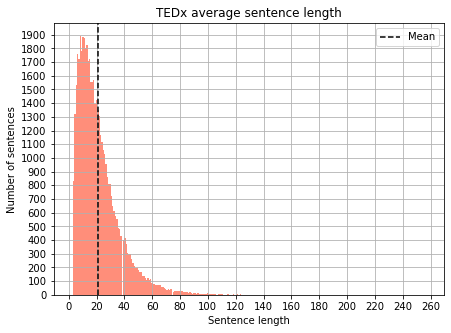

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))

g = dfh['Sentences_length'].hist(bins = 'auto', grid=True, color='#ff8e7a')
plt.xlabel("Sentence length")
plt.ylabel("Number of sentences")
title = "TEDx average sentence length"
plt.title(title)
plt.axvline(np.mean(dfh['Sentences_length']), c='k', ls='dashed', label='Mean')
plt.legend()

ax.yaxis.set_major_locator(MultipleLocator(100))
        
ax.xaxis.set_major_locator(MultipleLocator(20))

fig.savefig(path_images + title + '.png', dpi=fig.dpi, bbox_inches='tight')
        
plt.show()

In [73]:
np.mean(dfh['Sentences_length'])

21.399568810636005

In [87]:
np.mean(dfh['Sentences_length'])

21.399568810636005

In [124]:
for i, f in enumerate(lista_frasi_flusso_ripulito):
    if "Chiediamoci ancora una volta" in f:
        print(i, f)

13233 Chiediamoci ancora una volta: ma perché questo implica che il presente è esteso, è spesso?


In [125]:
lista_frasi_flusso_ripulito[13233+1]

'Mah, insomma, potrei sempre dire: "Va bene, io sto guardando un\'immagine di quattro anni fa.'

In [115]:
pr = pd.read_csv(path_dataset+"flusso_TEDx_completo_unificato.csv", sep = '\t')

In [116]:
pr

,Original_sentences
0,"C'è una cosa che io faccio sempre, quando pren..."
1,All'atterraggio e al decollo io guardo fuori d...
2,"Probabilmente lo fate anche voi, anche quando ..."
3,"Perché in realtà, una delle cose che ci piace ..."
4,Gli astronauti quando sono nello spazio per la...
...,...
51889,E una persona che ha questa capacità non può n...
51890,E allora come faccio io per cambiare il mondo?\n
51891,"Ci sono molti che vogliono cambiare il mondo, ..."
51892,Io credo che se si vuole veramente cambiare il...


In [120]:
a = list(pr['Original_sentences'])

for i, f in enumerate(a):
    if "Come funziona il cervello" in f:
        print(i, f)

21977 Nello specifico lui dice: (mi ha raccontato questa storia che poi non ha più raccontato negli ultimi 20 anni per cui la socializzo con voi, però lui non la racconta più) Come funziona il cervello.

